### PCA 개요 

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
## target은 윗줄까지만 하고, irisDF를 실행시켰을 때는 출력되지 않지만,
## target 변수로 받아서 출력해보면 데이터프레임에 들어있음
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

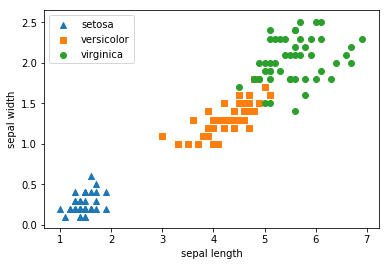

In [5]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
## 이 for문 정확히 어떻게 돌아가는지 한 번 생각해보기
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['petal_length']
    y_axis_data = irisDF[irisDF['target']==i]['petal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF) ## iris 데이터를 정규화해서 iris_scaled를 만들어줌

In [11]:
from sklearn.decomposition import PCA

iris_scaled
pca = PCA().fit(iris_scaled)
pca
## pca.explained_variance_ratio_ 각각의 값을 np.cumsum 함수를 모듈을 통해 누적해서 더해줌
np.cumsum(pca.explained_variance_ratio_)

array([0.76740358, 0.95023085, 0.98747608, 0.9958933 , 1.        ])

In [14]:
pca = PCA(n_components=2)
#pca
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca)

[[-2.57612023  0.47449927]
 [-2.41532249 -0.67809197]
 [-2.65933256 -0.34828193]
 [-2.60199054 -0.60330594]
 [-2.68374418  0.6402204 ]
 [-2.41219305  1.48486231]
 [-2.72650791  0.04037433]
 [-2.54754039  0.21784304]
 [-2.63111739 -1.12151504]
 [-2.50568834 -0.47375311]
 [-2.49309024  1.03899203]
 [-2.62658449  0.12690795]
 [-2.53463285 -0.73367377]
 [-2.89043509 -0.96998871]
 [-2.52492662  1.85524436]
 [-2.57661201  2.68047277]
 [-2.52724177  1.47833344]
 [-2.51071301  0.48379741]
 [-2.26217005  1.40241037]
 [-2.64311325  1.12144398]
 [-2.27440347  0.40624212]
 [-2.52398522  0.91873733]
 [-3.01440545  0.44855689]
 [-2.18617043  0.08328077]
 [-2.54029796  0.1318046 ]
 [-2.30389499 -0.62854387]
 [-2.38796377  0.23807154]
 [-2.49345491  0.52241515]
 [-2.46849629  0.30877814]
 [-2.57304603 -0.34338528]
 [-2.46542208 -0.50910641]
 [-2.20111339  0.42157396]
 [-2.88118696  1.78514571]
 [-2.7365533   2.14366739]
 [-2.44028112 -0.46445497]
 [-2.52638532 -0.21106318]
 [-2.38926985  0.65800169]
 

In [15]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.576120         0.474499       0
1        -2.415322        -0.678092       0
2        -2.659333        -0.348282       0

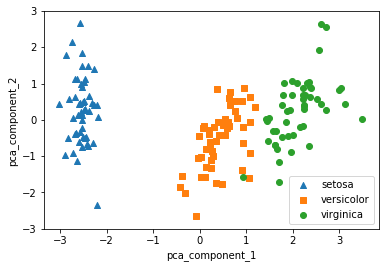

In [16]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [17]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=3)
print(scores) ## 정확도를 보기 위해서, cv=3 보면 알겠지만, 세 번 실행해서 결과값들을 봤다는 것임.

[0.98039216 0.94117647 1.        ]


In [19]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

[0.98039216 0.98039216 1.        ]
